### Practica 14 - Algoritmo Genetico para la función f(x) = x/(1 + x^2)

#### Paso 1: Librerias

In [61]:
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

#### Paso 2: Función objetivo

In [76]:
def objective_function(individuo):
    x = individuo[0]
    return (1 / (1+x**2),)

#### Paso 3: Definir los parametros

In [77]:
RANGO_X = (-10,10) # Rango de valores de x
POBLACION = 100 # Tamaño de la población
GENERACIONES = 50 # Número de generaciones
PROB_CRUCE = 0.7 # Probabilidad de cruce
PROB_MUTACION = 0.2 # Probabilidad de mutación
INDIVIDUO_DIM = 1 # Dimensión del individuo (1 valor x)

#### Paso 4: Inicializar la población

In [78]:
creator.create("FitnessMax",base.Fitness, weights=(1.0,))  # Maximizar
creator.create("Individual",list, fitness=creator.FitnessMax)

In [81]:
# Definimos los individuos y la población
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform,RANGO_X[0],RANGO_X[1]) # Define la forma en que se generan los genes de un
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, INDIVIDUO_DIM) #Define cómo generar un individuo
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #Define

In [82]:
toolbox.register("evaluate", objective_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selRoulette)

### Paso 5

In [83]:
def ejecutar_algoritmo_genetico():
    poblacion = toolbox.population(n=POBLACION)

    #Definir las estadísticas
    stats = tools.Statistics(lambda ind:  ind.fitness.values)
    # DEAP permite registrar estadísticas sobre la evolución del algoritmo.
    # Puedes usar tool.Statistics para recolectar información sobre los individuos de la población.
    # Como su aptitud máxima o primedio por generación
    stats.register("max", np.max)

    #Ejecutar el algoritmo genético
    mejor_individuo = algorithms.eaSimple(poblacion, toolbox, cxpb=PROB_CRUCE, mutpb=PROB_MUTACION, ngen=GENERACIONES, stats=stats, verbose=False)

    # Obtener el mejor individuo de la población final
    top_individuo = tools.selBest(poblacion, 1)[0]
    return top_individuo[0], objective_function(top_individuo)[0]

### Paso 6

In [85]:
def graficar_funcion_y_solucion(mejor_x, mejor_y):
    x_vals = np.linspace(RANGO_X[0],RANGO_X[1],400)
    y_vals = objective_function([x_vals])[0]
    plt.plot(x_vals,y_vals, label="f(x) = x / (1 + x^2)", color='b')

    plt.plot(mejor_x,mejor_y, 'ro', label=f"Mejor solución (x = {mejor_x:.4f}, f(x) = {mejor_y:.4f})")

    plt.title("Función f(x) = 1 / (1 + x^2) y mejor solución")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.plot()

### Paso 7

Mejor solución encontrada: x = -0.004694459099355024 f(x) = 0.999977962539425


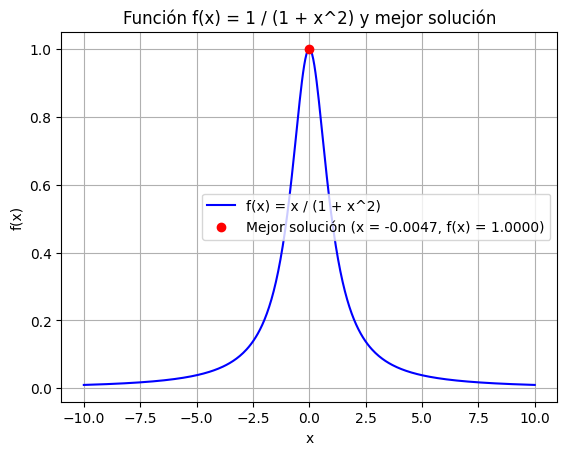

In [86]:
mejor_x, mejor_y = ejecutar_algoritmo_genetico()
print(f"Mejor solución encontrada: x = {mejor_x} f(x) = {mejor_y}")
graficar_funcion_y_solucion(mejor_x, mejor_y)
